<a href="https://colab.research.google.com/github/Rahulponnam2003/Smart-Loan-Recovery-System/blob/main/Loan_Recovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [155]:
df = pd.read_csv("/content/loan-recovery.csv")
print(df.head())

  Borrower_ID  Age  Gender Employment_Type  Monthly_Income  Num_Dependents  \
0       BRW_1   59    Male        Salaried          215422               0   
1       BRW_2   49  Female        Salaried           60893               0   
2       BRW_3   35    Male        Salaried          116520               1   
3       BRW_4   63  Female        Salaried          140818               2   
4       BRW_5   28    Male        Salaried           76272               1   

  Loan_ID  Loan_Amount  Loan_Tenure  Interest_Rate  ... Collateral_Value  \
0    LN_1      1445796           60          12.39  ...     1.727997e+06   
1    LN_2      1044620           12          13.47  ...     1.180032e+06   
2    LN_3      1923410           72           7.74  ...     2.622540e+06   
3    LN_4      1811663           36          12.23  ...     1.145493e+06   
4    LN_5        88578           48          16.13  ...     0.000000e+00   

   Outstanding_Loan_Amount  Monthly_EMI  Payment_History Num_Missed_Paymen

In [156]:
df.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


# **Distribution of the Loan amount and its relationship with the monthly Income:**

In [157]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


fig = px.histogram(df, x='Loan_Amount', nbins=30, marginal="violin", opacity=0.7,
                   title="Loan Amount Distribution & Relationship with Monthly Income",
                   labels={'Loan_Amount': "Loan Amount (in $)", 'Monthly_Income': "Monthly Income"},
                   color_discrete_sequence=["royalblue"])

fig.add_trace(go.Scatter(
    x=sorted(df['Loan_Amount']),
    y=px.histogram(df, x='Loan_Amount', nbins=30, histnorm='probability density').data[0]['y'],
    mode='lines',
    name='Density Curve',
    line=dict(color='red', width=2)
))

scatter = px.scatter(df, x='Loan_Amount', y='Monthly_Income',
                     color='Loan_Amount', color_continuous_scale='Viridis',
                     size=df['Loan_Amount'], hover_name=df.index)

for trace in scatter.data:
    fig.add_trace(trace)

fig.update_layout(
    annotations=[
        dict(
            x=max(df['Loan_Amount']) * 0.8, y=max(df['Monthly_Income']),
            text="Higher Loan Amounts are linked to Higher Income Levels",
            showarrow=True,
            arrowhead=2,
            font=dict(size=12, color="red")
        )
    ],
    xaxis_title="Loan Amount (in $)",
    yaxis_title="Monthly Income (in $)",
    template="plotly_white",
    showlegend=True
)

fig.show()

# **Analyzing how payment history affects Loan Recovery amount:**

In [158]:
fig = px.histogram(df, x="Payment_History", color="Recovery_Status", barmode="group",
                   title="How Payment History Affects Loan Recovery Status",
                   labels={"Payment_History": "Payment History", "count": "Number of Loans"},
                   color_discrete_map={"Recovered": "green", "Not Recovered": "red"})

fig.update_layout(
    xaxis_title="Payment History",
    yaxis_title="Number of Loans",
    legend_title="Recovery Status",
    template="plotly_white",
        )

fig.show()

# **Analyzing how missed payments affect Loan Recovery:**

In [159]:
fig = px.box(df, x="Recovery_Status", y="Num_Missed_Payments",
             title="How Missed Payments Affect Loan Recovery Status",
             labels={"Recovery_Status": "Recovery Status", "Num_Missed_Payments": "Number of Missed Payments"},
             color="Recovery_Status",
             color_discrete_map={"Recovered": "green", "Not Recovered": "red"},
             points="all")

fig.update_layout(
    xaxis_title="Recovery Status",
    yaxis_title="Number of Missed Payments",
    template="plotly_white"
)

fig.show()

# **Analyzing Loan Recovery Based on Monthly Income**

In [111]:
fig = px.scatter(df, x='Monthly_Income', y='Loan_Amount',
                 color='Recovery_Status', size='Loan_Amount',
                 hover_data={'Monthly_Income': True, 'Loan_Amount': True, 'Recovery_Status': True},
                 title="How Monthly Income and Loan Amount Affect Loan Recovery",
                 labels={"Monthly_Income": "Monthly Income ($)", "Loan_Amount": "Loan Amount ($)"},
                 color_discrete_map={"Recovered": "green", "Not Recovered": "red"})

fig.add_annotation(
    x=max(df['Monthly_Income']), y=max(df['Loan_Amount']),
    text="Higher loans may still get recovered if income is high",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="red")
)

fig.update_layout(
    xaxis_title="Monthly Income ($)",
    yaxis_title="Loan Amount ($)",
    template="plotly_white"
)

fig.show()

# **Impact of Income on Loan Recovery**

In [112]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [113]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Borrower_Segment'] = kmeans.fit_predict(df_scaled)

fig = px.scatter(df, x='Monthly_Income', y='Loan_Amount',
                 color=df['Borrower_Segment'].astype(str), size='Loan_Amount',
                 hover_data={'Monthly_Income': True, 'Loan_Amount': True, 'Borrower_Segment': True},
                 title="Borrower Segments Based on Monthly Income and Loan Amount",
                 labels={"Monthly_Income": "Monthly Income ($)", "Loan_Amount": "Loan Amount ($)", "Borrower_Segment": "Segment"},
                 color_discrete_sequence=px.colors.qualitative.Vivid)

fig.add_annotation(
    x=df['Monthly_Income'].mean(), y=df['Loan_Amount'].max(),
    text="Higher loans are clustered in specific income groups",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="red")
)

fig.update_layout(
    xaxis_title="Monthly Income ($)",
    yaxis_title="Loan Amount ($)",
    template="plotly_white",
    legend_title="Borrower Segment"
)

fig.show()

In [114]:
# updating segment names
df['Segment_Name'] = df['Borrower_Segment'].map({
    0: 'Moderate Income, High Loan Burden',
    1: 'High Income, Low Default Risk',
    2: 'Moderate Income, Medium Risk',
    3: 'High Loan, Higher Default Risk'
})

# **Building an Early Detection System for Loan Defaults based on the Risk Scores**

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df['High_Risk_Flag'] = df['Segment_Name'].apply(lambda x: 1 if x in ['High Loan, Higher Default Risk', 'Moderate Income, High Loan Burden'] else 0)

# selecting features for the model
features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']
X = df[features]
y = df['High_Risk_Flag']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# training the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# get risk scores (probability of being high risk)
risk_scores = rf_model.predict_proba(X_test)[:, 1]  # probability of high risk

# add risk scores and flags to test data
df_test = X_test.copy()
df_test['Risk_Score'] = risk_scores
df_test['Predicted_High_Risk'] = (df_test['Risk_Score'] > 0.5).astype(int)  # Threshold at 50% probability

# merging with borrower details
df_test = df_test.merge(df[['Borrower_ID', 'Segment_Name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
                        left_index=True, right_index=True)

In [116]:
# creating a new column for the dynamic recovery strategy based on risk scores
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return "Immediate legal notices & aggressive recovery attempts"
    elif 0.50 <= risk_score <= 0.75:
        return "Settlement offers & repayment plans"
    else:
        return "Automated reminders & monitoring"

df_test['Recovery_Strategy'] = df_test['Risk_Score'].apply(assign_recovery_strategy)

df_test.head()

,Age,Monthly_Income,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Risk_Score,Predicted_High_Risk,Borrower_ID,Segment_Name,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken,Recovery_Strategy
436,25,156826,1510049,60,16.22,8.373402e+05,3.296001e+05,5493.34,1,179,0.42,0,BRW_437,"High Loan, Higher Default Risk",Partially Recovered,Legal Notice,7,No,Automated reminders & monitoring
448,57,33752,1803767,12,8.30,0.000000e+00,4.411477e+05,36762.31,0,0,0.64,1,BRW_449,"Moderate Income, High Loan Burden",Fully Recovered,Calls,2,No,Settlement offers & repayment plans
88,27,71503,1898058,24,12.59,1.087594e+06,4.227607e+05,17615.03,2,179,0.76,1,BRW_89,"High Loan, Higher Default Risk",Fully Recovered,Debt Collectors,3,No,Immediate legal notices & aggressive recovery ...
145,59,215641,1492181,36,15.85,1.340937e+06,1.337482e+06,37152.29,3,125,0.32,0,BRW_146,"High Income, Low Default Risk",Fully Recovered,Calls,3,No,Automated reminders & monitoring
344,52,106658,1958911,36,12.09,2.128380e+06,1.592191e+06,44227.52,0,0,0.09,0,BRW_345,"High Income, Low Default Risk",Fully Recovered,Calls,0,No,Automated reminders & monitoring


/tmp/ipython-input-117-2250442153.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




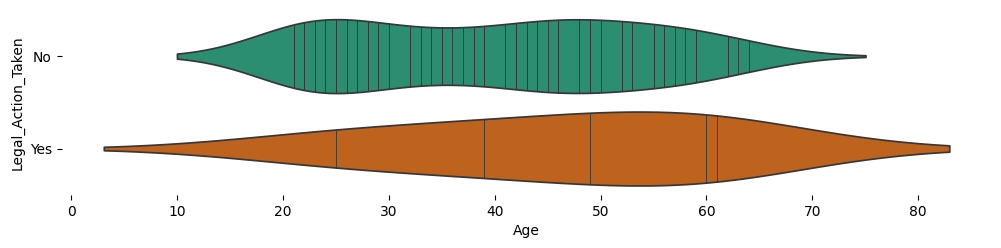

In [117]:
# @title Legal_Action_Taken vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_test['Legal_Action_Taken'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_test, x='Age', y='Legal_Action_Taken', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-118-442989798.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




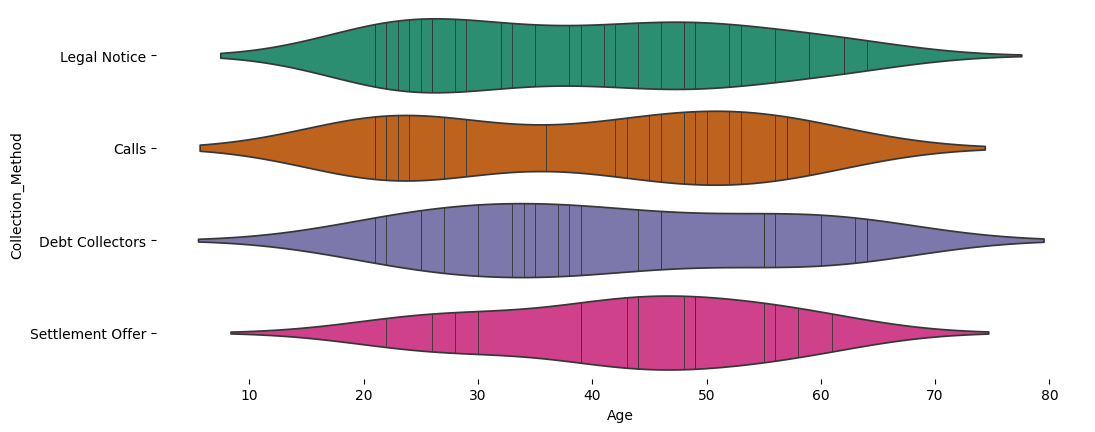

In [118]:
# @title Collection_Method vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_test['Collection_Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_test, x='Age', y='Collection_Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-119-2207747459.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




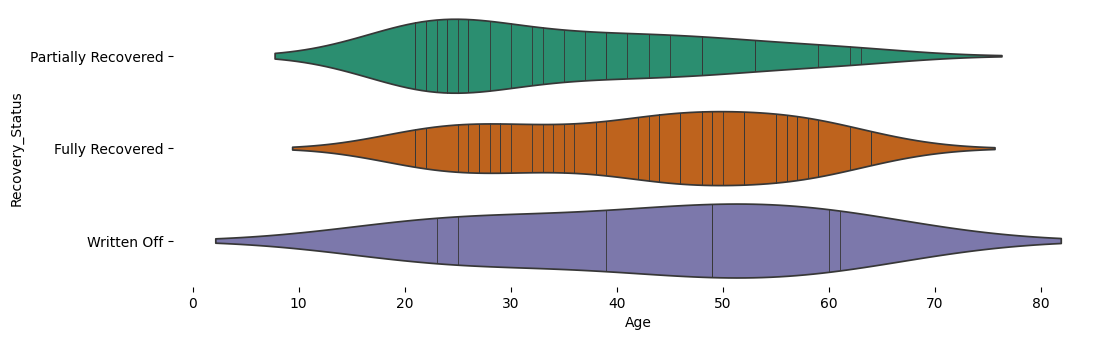

In [119]:
# @title Recovery_Status vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_test['Recovery_Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_test, x='Age', y='Recovery_Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-120-283346259.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




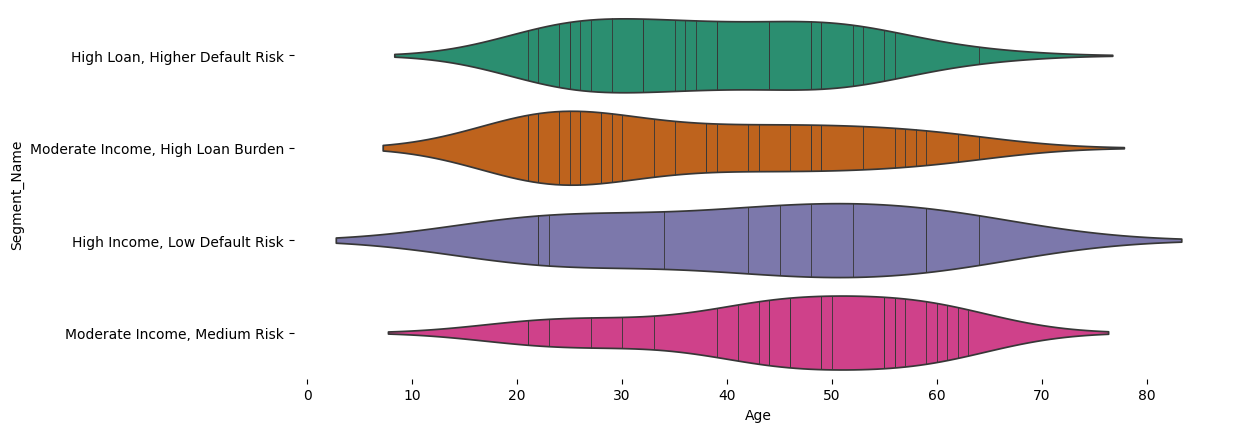

In [120]:
# @title Segment_Name vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_test['Segment_Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_test, x='Age', y='Segment_Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

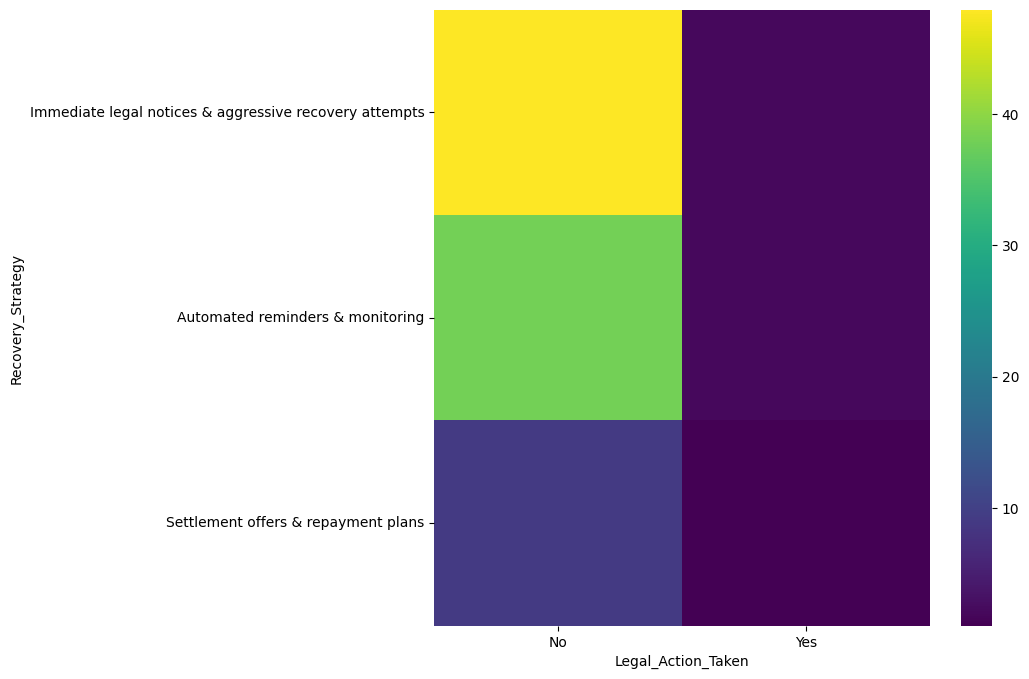

In [121]:
# @title Legal_Action_Taken vs Recovery_Strategy

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Recovery_Strategy'].value_counts()
    for x_label, grp in df_test.groupby('Legal_Action_Taken')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Legal_Action_Taken')
_ = plt.ylabel('Recovery_Strategy')

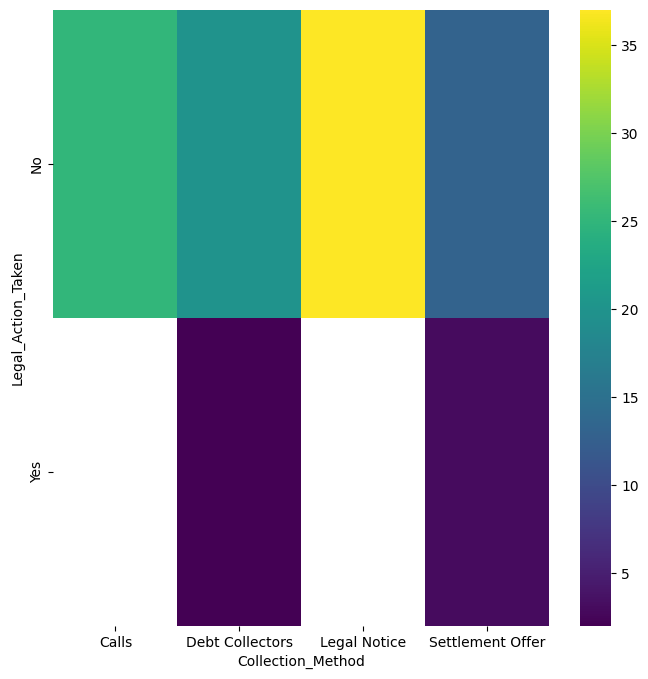

In [122]:
# @title Collection_Method vs Legal_Action_Taken

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Legal_Action_Taken'].value_counts()
    for x_label, grp in df_test.groupby('Collection_Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Collection_Method')
_ = plt.ylabel('Legal_Action_Taken')

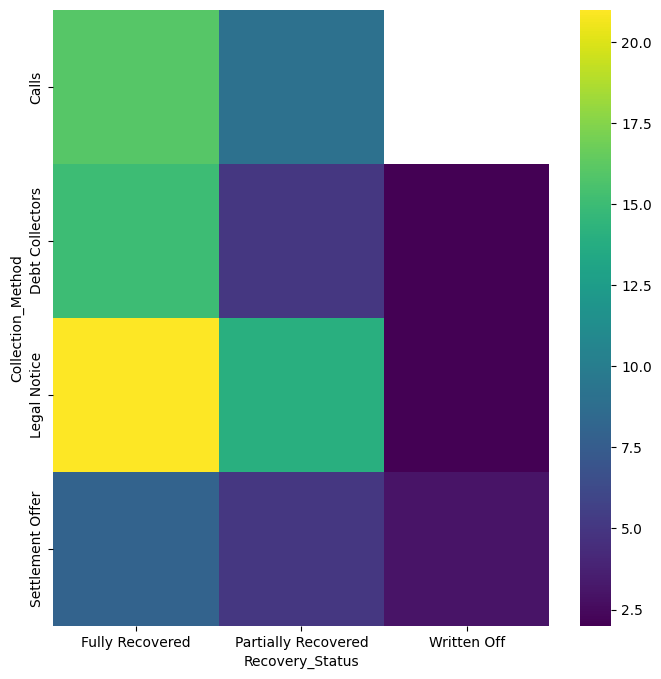

In [123]:
# @title Recovery_Status vs Collection_Method

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Collection_Method'].value_counts()
    for x_label, grp in df_test.groupby('Recovery_Status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Recovery_Status')
_ = plt.ylabel('Collection_Method')

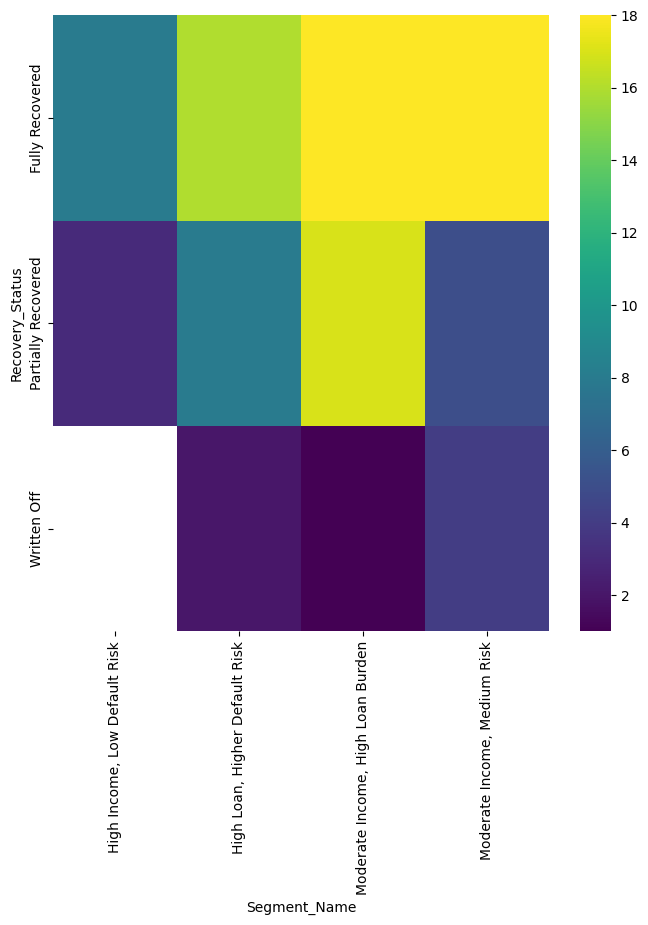

In [124]:
# @title Segment_Name vs Recovery_Status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Recovery_Status'].value_counts()
    for x_label, grp in df_test.groupby('Segment_Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Segment_Name')
_ = plt.ylabel('Recovery_Status')

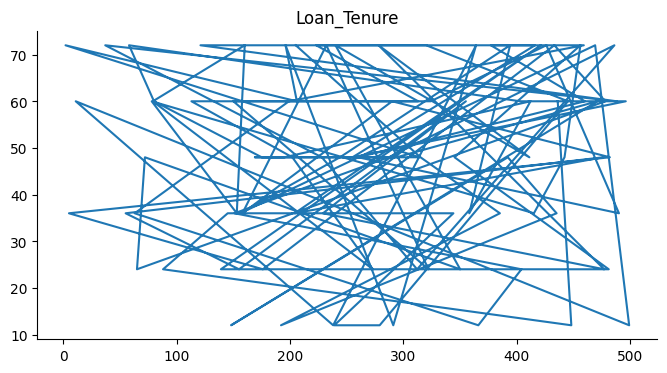

In [125]:
# @title Loan_Tenure

from matplotlib import pyplot as plt
df_test['Loan_Tenure'].plot(kind='line', figsize=(8, 4), title='Loan_Tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

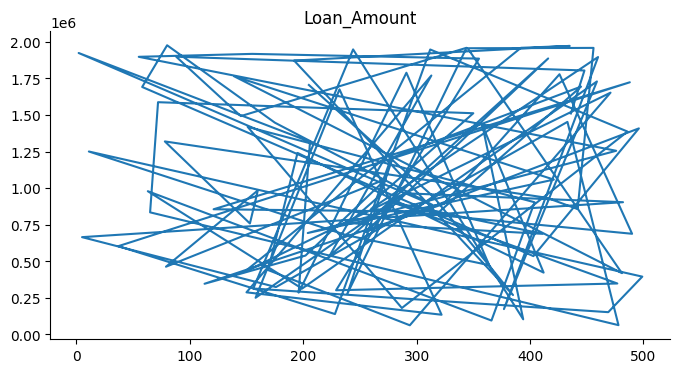

In [126]:
# @title Loan_Amount

from matplotlib import pyplot as plt
df_test['Loan_Amount'].plot(kind='line', figsize=(8, 4), title='Loan_Amount')
plt.gca().spines[['top', 'right']].set_visible(False)

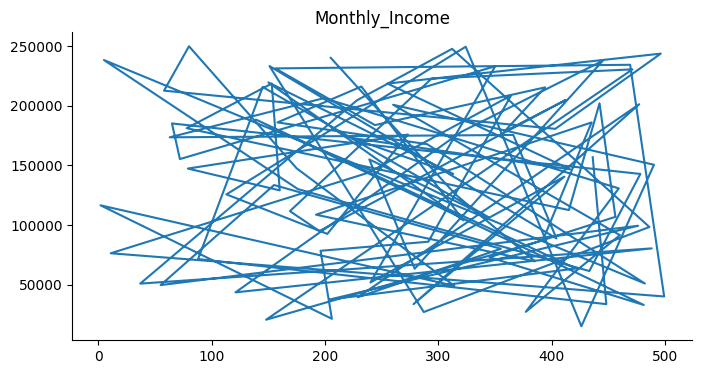

In [127]:
# @title Monthly_Income

from matplotlib import pyplot as plt
df_test['Monthly_Income'].plot(kind='line', figsize=(8, 4), title='Monthly_Income')
plt.gca().spines[['top', 'right']].set_visible(False)

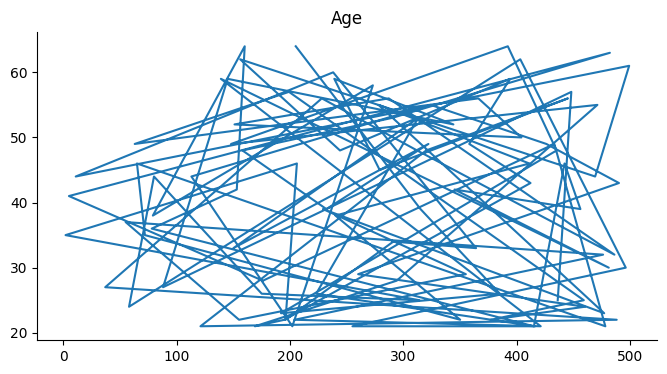

In [128]:
# @title Age

from matplotlib import pyplot as plt
df_test['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

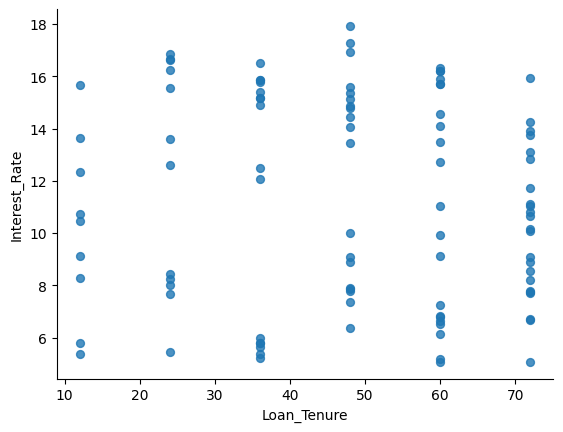

In [129]:
# @title Loan_Tenure vs Interest_Rate

from matplotlib import pyplot as plt
df_test.plot(kind='scatter', x='Loan_Tenure', y='Interest_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

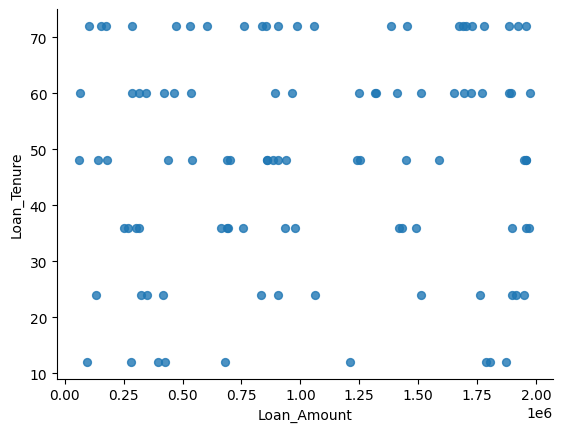

In [130]:
# @title Loan_Amount vs Loan_Tenure

from matplotlib import pyplot as plt
df_test.plot(kind='scatter', x='Loan_Amount', y='Loan_Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

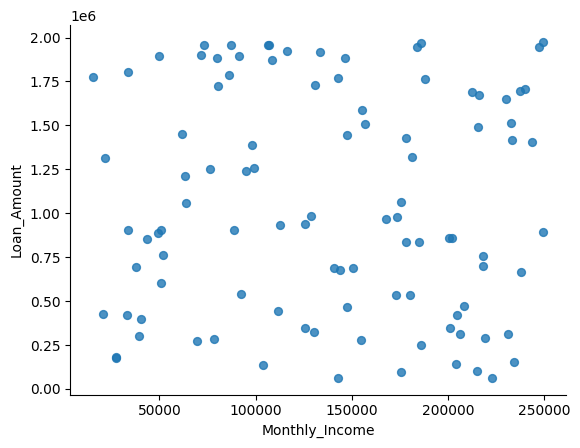

In [131]:
# @title Monthly_Income vs Loan_Amount

from matplotlib import pyplot as plt
df_test.plot(kind='scatter', x='Monthly_Income', y='Loan_Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

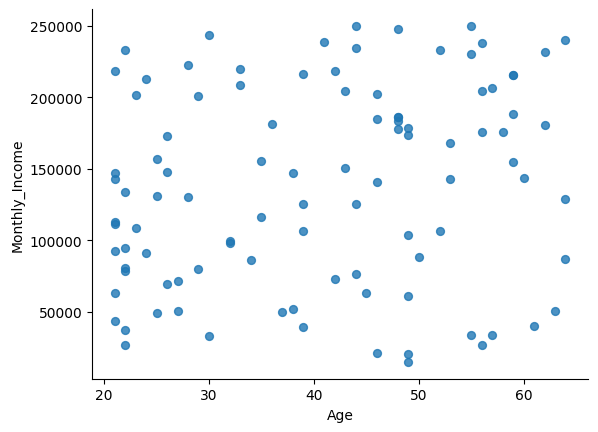

In [132]:
# @title Age vs Monthly_Income

from matplotlib import pyplot as plt
df_test.plot(kind='scatter', x='Age', y='Monthly_Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

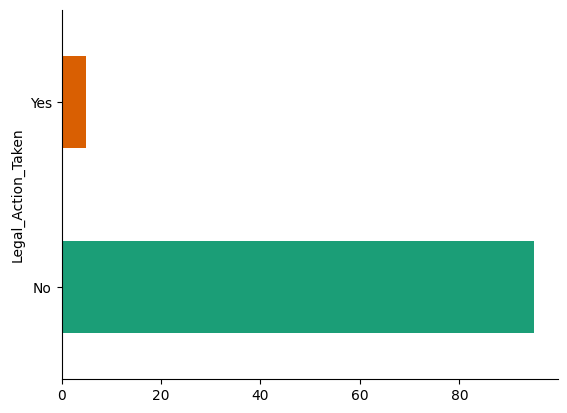

In [133]:
# @title Legal_Action_Taken

from matplotlib import pyplot as plt
import seaborn as sns
df_test.groupby('Legal_Action_Taken').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

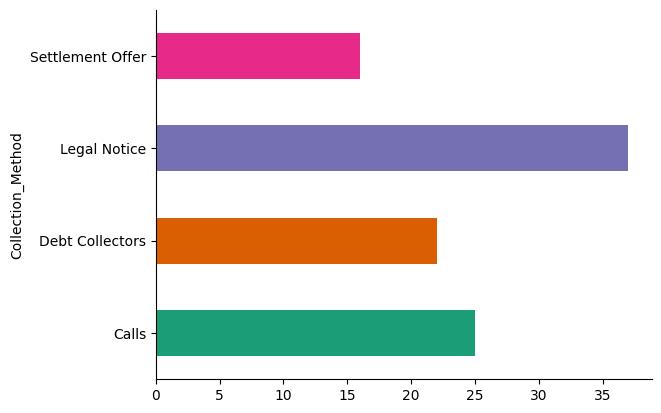

In [134]:
# @title Collection_Method

from matplotlib import pyplot as plt
import seaborn as sns
df_test.groupby('Collection_Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

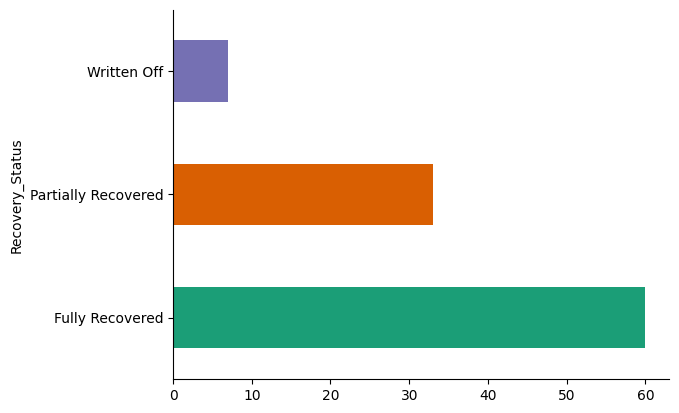

In [135]:
# @title Recovery_Status

from matplotlib import pyplot as plt
import seaborn as sns
df_test.groupby('Recovery_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

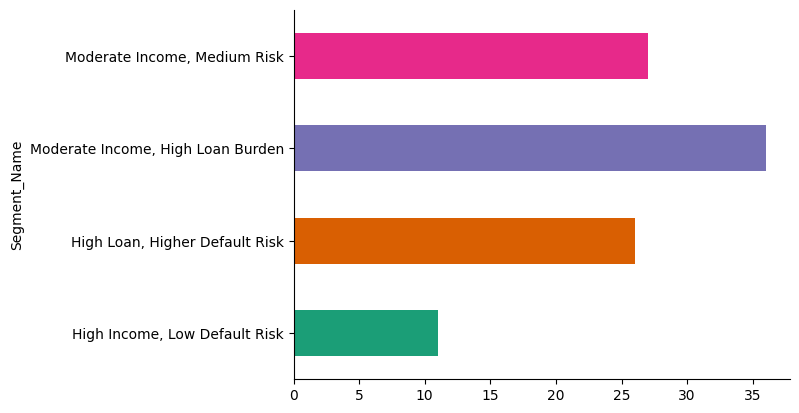

In [136]:
# @title Segment_Name

from matplotlib import pyplot as plt
import seaborn as sns
df_test.groupby('Segment_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

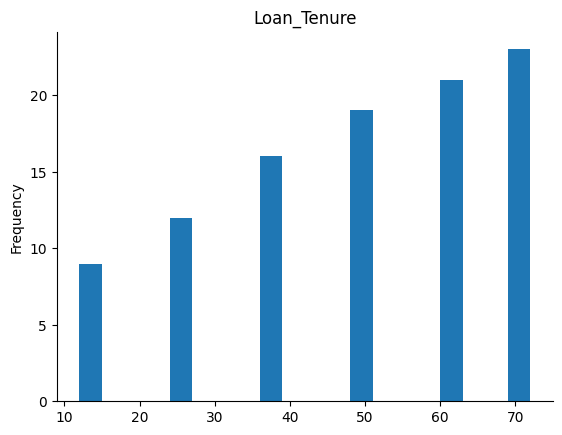

In [137]:
# @title Loan_Tenure

from matplotlib import pyplot as plt
df_test['Loan_Tenure'].plot(kind='hist', bins=20, title='Loan_Tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

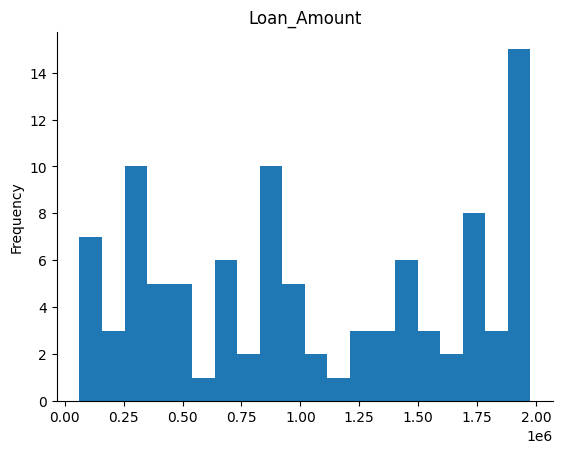

In [138]:
# @title Loan_Amount

from matplotlib import pyplot as plt
df_test['Loan_Amount'].plot(kind='hist', bins=20, title='Loan_Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

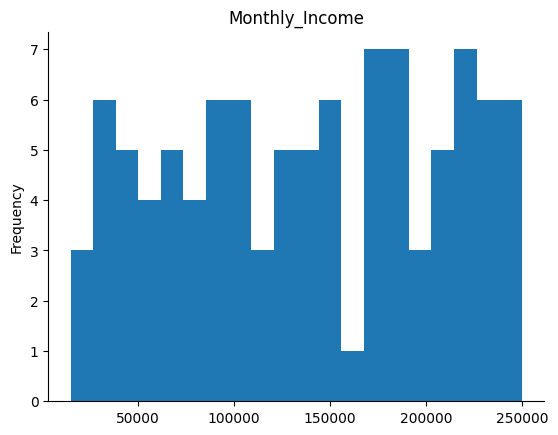

In [139]:
# @title Monthly_Income

from matplotlib import pyplot as plt
df_test['Monthly_Income'].plot(kind='hist', bins=20, title='Monthly_Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

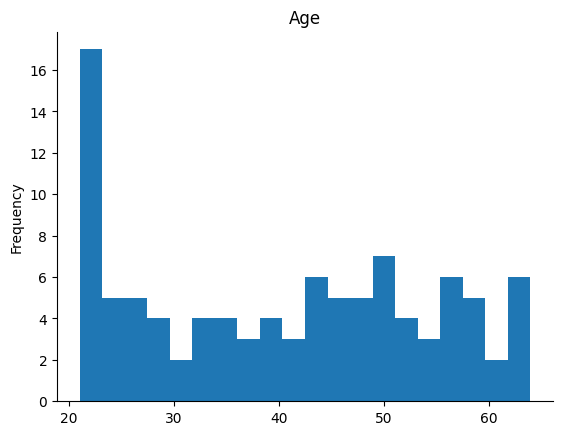

In [140]:
# @title Age

from matplotlib import pyplot as plt
df_test['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [141]:

# 1. Distribution of Risk Scores.
fig = px.histogram(df_test, x='Risk_Score', nbins=50, marginal='violin',
                   title='Distribution of Predicted Risk Scores',
                   labels={'Risk_Score': 'Predicted Risk Score'},
                   color_discrete_sequence=['darkblue'])
fig.update_layout(xaxis_title='Predicted Risk Score', yaxis_title='Frequency')
fig.show()

# 2. Risk Score vs. Loan Amount with Recovery Status Overlay
fig = px.scatter(df_test, x='Loan_Amount', y='Risk_Score', color='Recovery_Status',
                 size='Loan_Amount',  # Size points by Loan Amount
                 hover_data=['Borrower_ID', 'Risk_Score', 'Recovery_Status', 'Loan_Amount'],
                 title='Risk Score vs. Loan Amount with Recovery Status Overlay',
                 labels={'Loan_Amount': 'Loan Amount ($)', 'Risk_Score': 'Predicted Risk Score'},
                 color_discrete_map={"Recovered": "green", "Not Recovered": "red"})
fig.update_layout(xaxis_title='Loan Amount ($)', yaxis_title='Predicted Risk Score',
                  legend_title='Recovery Status')
fig.show()

# 3. Count of Loans by Recovery Strategy.
recovery_counts = df_test['Recovery_Strategy'].value_counts().reset_index()
recovery_counts.columns = ['Recovery_Strategy', 'Count'] # Rename columns

fig = px.bar(recovery_counts,
             x='Recovery_Strategy', y='Count',
             title='Count of Loans by Assigned Recovery Strategy',
             labels={'Recovery_Strategy': 'Recovery Strategy', 'Count': 'Number of Loans'})
fig.update_layout(xaxis_title='Recovery Strategy', yaxis_title='Number of Loans',
                  xaxis={'categoryarray': recovery_counts['Recovery_Strategy'].tolist()}) # Order bars
fig.show()

In [142]:
# 4.Distribution of Risk Scores by Recovery Strategy
# 5. Feature Importance
# 6. Risk Score vs. Monthly Income with Segment Overlay   plot it

# 4. Distribution of Risk Scores by Recovery Strategy
fig = px.box(df_test, x='Recovery_Strategy', y='Risk_Score',
             title='Distribution of Risk Scores by Assigned Recovery Strategy',
             labels={'Recovery_Strategy': 'Recovery Strategy', 'Risk_Score': 'Predicted Risk Score'},
             color='Recovery_Strategy',
             points="all") # Show all data points
fig.update_layout(xaxis_title='Recovery Strategy', yaxis_title='Predicted Risk Score',
                  legend_title='Recovery Strategy')
fig.show()

# 5. Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

fig = px.bar(x=feature_importances.index, y=feature_importances.values,
             title='Feature Importance from Random Forest Model',
             labels={'x': 'Feature', 'y': 'Importance'},
             color=feature_importances.values,
             color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='Feature', yaxis_title='Importance')
fig.show()

# 6. Risk Score vs. Monthly Income with Segment Overlay
fig = px.scatter(df_test, x='Monthly_Income', y='Risk_Score', color='Segment_Name',
                 size='Loan_Amount',  # Size points by Loan Amount
                 hover_data=['Borrower_ID', 'Risk_Score', 'Segment_Name', 'Monthly_Income'],
                 title='Risk Score vs. Monthly Income with Borrower Segment Overlay',
                 labels={'Monthly_Income': 'Monthly Income ($)', 'Risk_Score': 'Predicted Risk Score', 'Segment_Name': 'Borrower Segment'},
                 color_discrete_sequence=px.colors.qualitative.Vivid) # Use the same color scale as for segments
fig.update_layout(xaxis_title='Monthly Income ($)', yaxis_title='Predicted Risk Score',
                  legend_title='Borrower Segment')
fig.show()

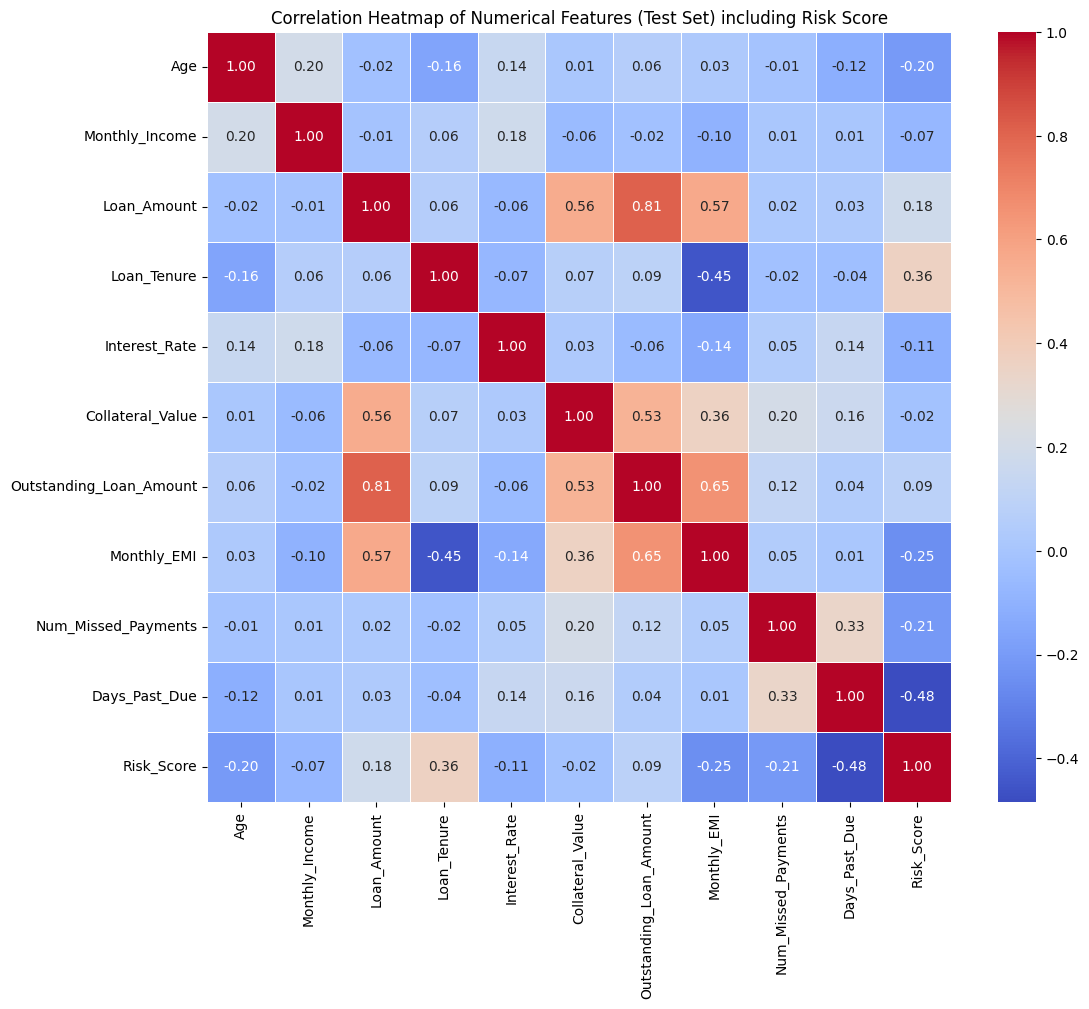

In [160]:
# Select only numerical features for correlation analysis
numerical_features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
                      'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due', 'Risk_Score']

# Calculate the correlation matrix for the numerical features in the test set
correlation_matrix = df_test[numerical_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (Test Set) including Risk Score')
plt.show()

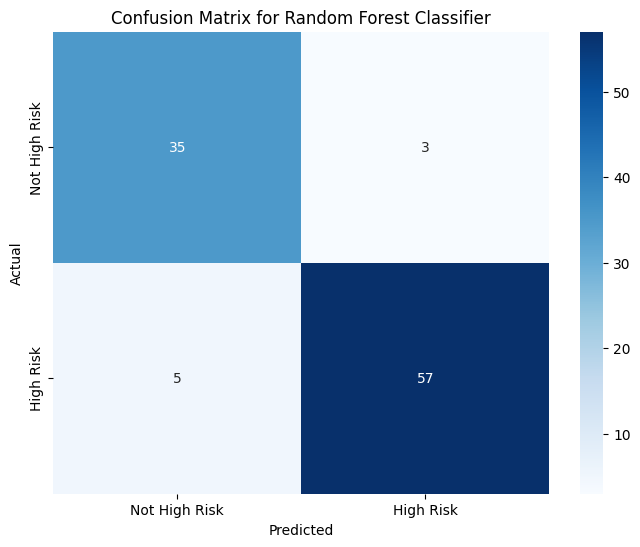

Classification Report:
               precision    recall  f1-score   support

Not High Risk       0.88      0.92      0.90        38
    High Risk       0.95      0.92      0.93        62

     accuracy                           0.92       100
    macro avg       0.91      0.92      0.92       100
 weighted avg       0.92      0.92      0.92       100



In [161]:

from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High Risk', 'High Risk'], yticklabels=['Not High Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not High Risk', 'High Risk']))

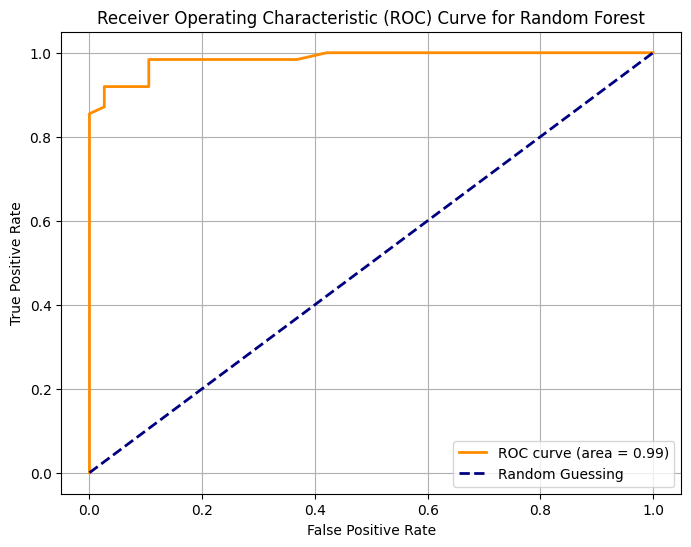

In [162]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (High_Risk_Flag = 1)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [146]:
!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

# Create the target variable
df['High_Risk_Flag'] = df['Segment_Name'].apply(
    lambda x: 1 if x in ['High Loan, Higher Default Risk', 'Moderate Income, High Loan Burden'] else 0)

# Select features + Borrower_ID for tracking
features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI',
            'Num_Missed_Payments', 'Days_Past_Due', 'Borrower_ID']
X = df[features]
y = df['High_Risk_Flag']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Separate Borrower_ID for merging later
borrower_ids_test = X_test['Borrower_ID']

# Remove Borrower_ID from features before training
X_train = X_train.drop(columns=['Borrower_ID'])
X_test = X_test.drop(columns=['Borrower_ID'])

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict risk scores (probability of high risk)
risk_scores = xgb_model.predict_proba(X_test)[:, 1]

# Prepare test DataFrame
df_test = X_test.copy()
df_test['Borrower_ID'] = borrower_ids_test.values
df_test['Risk_Score'] = risk_scores
df_test['Predicted_High_Risk'] = (df_test['Risk_Score'] > 0.5).astype(int)

# Merge with borrower info
df_test = df_test.merge(
    df[['Borrower_ID', 'Segment_Name', 'Recovery_Status',
        'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
    on='Borrower_ID', how='left'
)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[10:11:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [163]:

# 1. Distribution of Risk Scores.
fig = px.histogram(df_test, x='Risk_Score', nbins=50, marginal='violin',
                   title='Distribution of Predicted Risk Scores (XGBoost)',
                   labels={'Risk_Score': 'Predicted Risk Score'},
                   color_discrete_sequence=['darkblue'])
fig.update_layout(xaxis_title='Predicted Risk Score', yaxis_title='Frequency')
fig.show()

# 2. Risk Score vs. Loan Amount with Recovery Status Overlay
fig = px.scatter(df_test, x='Loan_Amount', y='Risk_Score', color='Recovery_Status',
                 size='Loan_Amount',  # Size points by Loan Amount
                 hover_data=['Borrower_ID', 'Risk_Score', 'Recovery_Status', 'Loan_Amount'],
                 title='Risk Score vs. Loan Amount with Recovery Status Overlay (XGBoost)',
                 labels={'Loan_Amount': 'Loan Amount ($)', 'Risk_Score': 'Predicted Risk Score'},
                 color_discrete_map={"Recovered": "green", "Not Recovered": "red"})
fig.update_layout(xaxis_title='Loan Amount ($)', yaxis_title='Predicted Risk Score',
                  legend_title='Recovery Status')
fig.show()

# 3. Count of Loans by Recovery Strategy (Using the strategy assigned based on XGBoost scores).
# Re-assign recovery strategy based on XGBoost risk scores
df_test['Recovery_Strategy'] = df_test['Risk_Score'].apply(assign_recovery_strategy)

recovery_counts = df_test['Recovery_Strategy'].value_counts().reset_index()
recovery_counts.columns = ['Recovery_Strategy', 'Count'] # Rename columns

fig = px.bar(recovery_counts,
             x='Recovery_Strategy', y='Count',
             title='Count of Loans by Assigned Recovery Strategy (Based on XGBoost)',
             labels={'Recovery_Strategy': 'Recovery Strategy', 'Count': 'Number of Loans'})
fig.update_layout(xaxis_title='Recovery Strategy', yaxis_title='Number of Loans',
                  xaxis={'categoryarray': recovery_counts['Recovery_Strategy'].tolist()}) # Order bars
fig.show()

In [164]:

# 4. Distribution of Risk Scores by Recovery Strategy
fig = px.box(df_test, x='Recovery_Strategy', y='Risk_Score',
             title='Distribution of Risk Scores by Assigned Recovery Strategy (XGBoost)',
             labels={'Recovery_Strategy': 'Recovery Strategy', 'Risk_Score': 'Predicted Risk Score'},
             color='Recovery_Strategy',
             points="all") # Show all data points
fig.update_layout(xaxis_title='Recovery Strategy', yaxis_title='Predicted Risk Score',
                  legend_title='Recovery Strategy')
fig.show()

# 5. Feature Importance (from XGBoost)
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

fig = px.bar(x=feature_importances_xgb.index, y=feature_importances_xgb.values,
             title='Feature Importance from XGBoost Model',
             labels={'x': 'Feature', 'y': 'Importance'},
             color=feature_importances_xgb.values,
             color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='Feature', yaxis_title='Importance')
fig.show()

# 6. Risk Score vs. Monthly Income with Segment Overlay (XGBoost)
fig = px.scatter(df_test, x='Monthly_Income', y='Risk_Score', color='Segment_Name',
                 size='Loan_Amount',  # Size points by Loan Amount
                 hover_data=['Borrower_ID', 'Risk_Score', 'Segment_Name', 'Monthly_Income'],
                 title='Risk Score vs. Monthly Income with Borrower Segment Overlay (XGBoost)',
                 labels={'Monthly_Income': 'Monthly Income ($)', 'Risk_Score': 'Predicted Risk Score', 'Segment_Name': 'Borrower Segment'},
                 color_discrete_sequence=px.colors.qualitative.Vivid) # Use the same color scale as for segments
fig.update_layout(xaxis_title='Monthly Income ($)', yaxis_title='Predicted Risk Score',
                  legend_title='Borrower Segment')
fig.show()


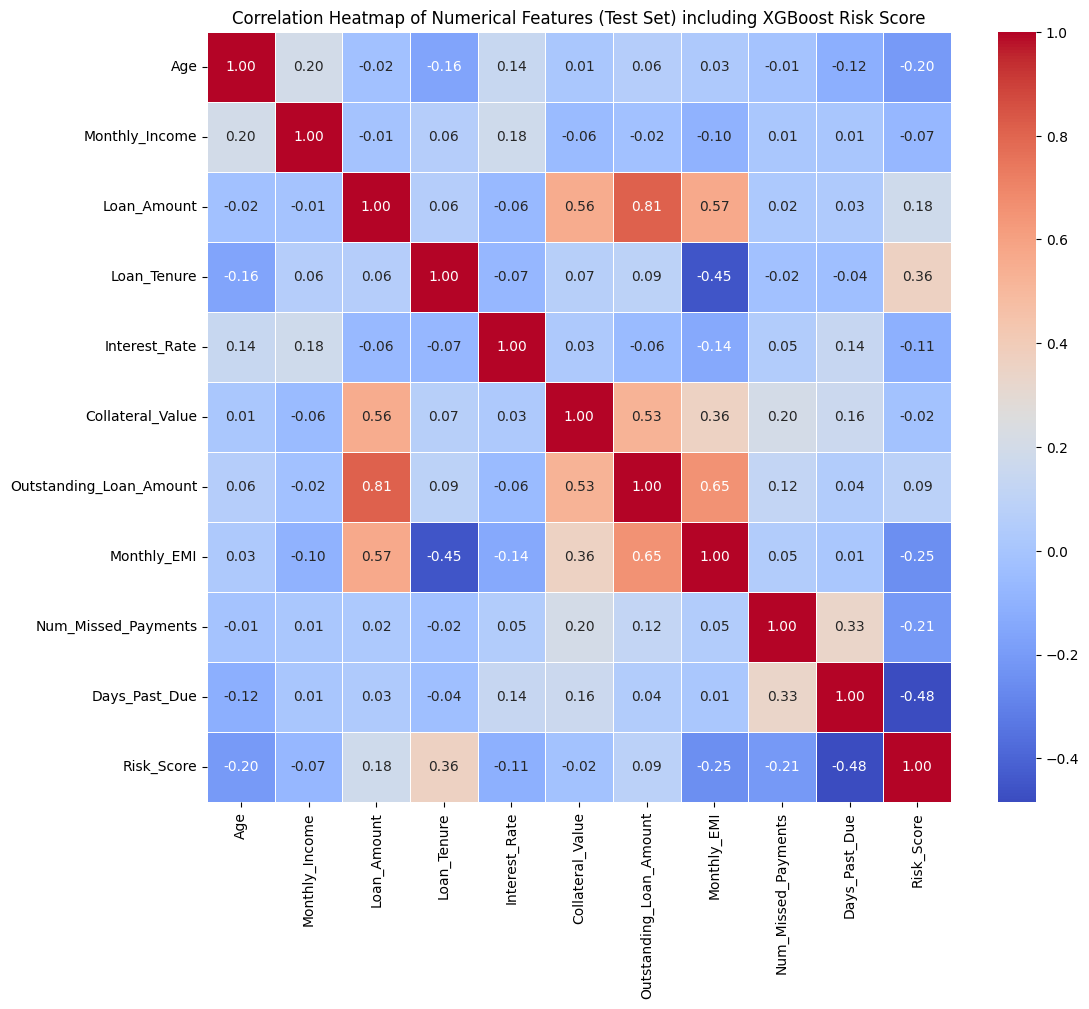

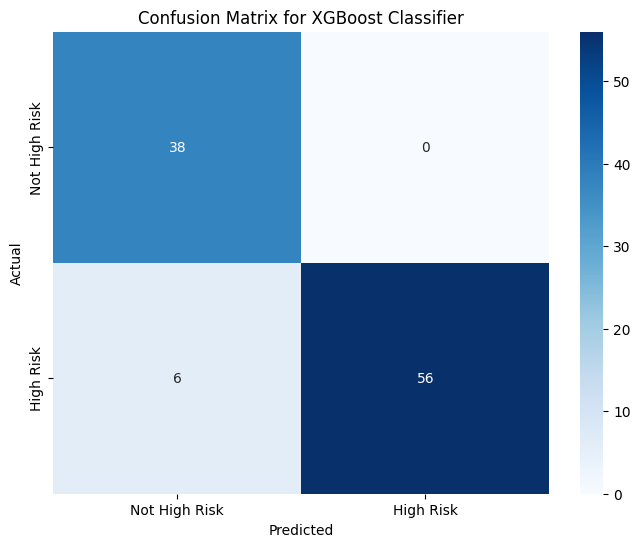

Classification Report (XGBoost):
               precision    recall  f1-score   support

Not High Risk       0.86      1.00      0.93        38
    High Risk       1.00      0.90      0.95        62

     accuracy                           0.94       100
    macro avg       0.93      0.95      0.94       100
 weighted avg       0.95      0.94      0.94       100



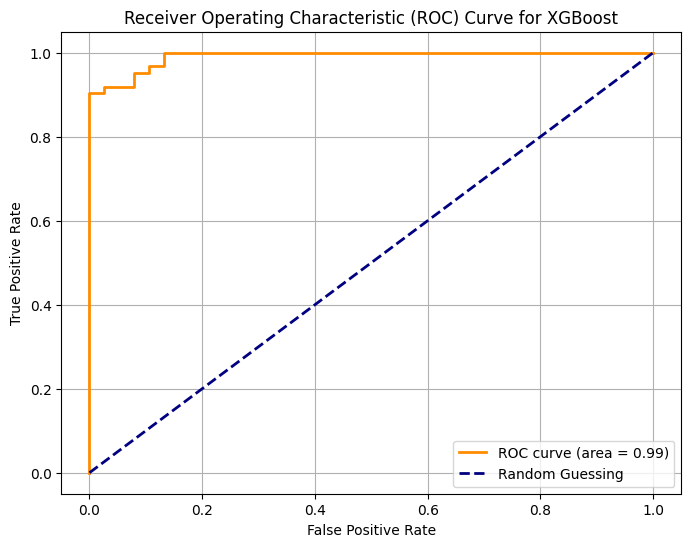

In [165]:

# Calculate the correlation matrix for the numerical features in the test set including the XGBoost Risk Score
correlation_matrix_xgb = df_test[numerical_features].corr()

# Plot the correlation heatmap for XGBoost
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_xgb, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (Test Set) including XGBoost Risk Score')
plt.show()

# Predict on the test data using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Generate confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High Risk', 'High Risk'], yticklabels=['Not High Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# Generate classification report for XGBoost
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=['Not High Risk', 'High Risk']))


# Get predicted probabilities for the positive class (High_Risk_Flag = 1) using XGBoost
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

# Calculate AUC for XGBoost
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [166]:

# --- Model Comparison and Conclusion ---

# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_test)
rf_classification_report = classification_report(y_test, y_pred_rf, target_names=['Not High Risk', 'High Risk'], output_dict=True)
rf_auc_score = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Evaluate XGBoost Model
y_pred_xgb = xgb_model.predict(X_test)
xgb_classification_report = classification_report(y_test, y_pred_xgb, target_names=['Not High Risk', 'High Risk'], output_dict=True)
xgb_auc_score = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Print Comparison Metrics
print("--- Model Performance Comparison ---")
print("\nRandom Forest:")
print(f"  Accuracy: {rf_classification_report['accuracy']:.4f}")
print(f"  Precision (High Risk): {rf_classification_report['High Risk']['precision']:.4f}")
print(f"  Recall (High Risk): {rf_classification_report['High Risk']['recall']:.4f}")
print(f"  F1-Score (High Risk): {rf_classification_report['High Risk']['f1-score']:.4f}")
print(f"  AUC: {rf_auc_score:.4f}")

print("\nXGBoost:")
print(f"  Accuracy: {xgb_classification_report['accuracy']:.4f}")
print(f"  Precision (High Risk): {xgb_classification_report['High Risk']['precision']:.4f}")
print(f"  Recall (High Risk): {xgb_classification_report['High Risk']['recall']:.4f}")
print(f"  F1-Score (High Risk): {xgb_classification_report['High Risk']['f1-score']:.4f}")
print(f"  AUC: {xgb_auc_score:.4f}")

# Conclude the best algorithm based on a primary metric (e.g., AUC or F1-score for High Risk)
# AUC is often a good metric for imbalanced datasets, and identifying high-risk cases is crucial here.

print("\n--- Conclusion ---")
if xgb_auc_score > rf_auc_score:
    print("Based on the AUC score, XGBoost appears to be the better performing algorithm for this task.")
    print("It achieves a higher AUC, indicating a better ability to distinguish between high-risk and non-high-risk loans.")
elif rf_auc_score > xgb_auc_score:
     print("Based on the AUC score, Random Forest appears to be the better performing algorithm for this task.")
     print("It achieves a higher AUC, indicating a better ability to distinguish between high-risk and non-high-risk loans.")
else:
    print("Random Forest and XGBoost performed similarly based on the AUC score.")

# You can also compare other metrics like F1-score for the 'High Risk' class
if xgb_classification_report['High Risk']['f1-score'] > rf_classification_report['High Risk']['f1-score']:
    print("XGBoost also has a higher F1-score for the 'High Risk' class, suggesting a better balance between precision and recall for identifying high-risk loans.")
elif rf_classification_report['High Risk']['f1-score'] > xgb_classification_report['High Risk']['f1-score']:
    print("Random Forest also has a higher F1-score for the 'High Risk' class, suggesting a better balance between precision and recall for identifying high-risk loans.")
else:
    print("Random Forest and XGBoost have similar F1-scores for the 'High Risk' class.")

print("\nConsider other factors like training time and interpretability when making a final decision for production deployment.")
print(f"XGBoost AUC: {xgb_auc_score:.4f}")
print(f"Random Forest AUC: {rf_auc_score:.4f}")
print(f"XGBoost F1 (High Risk): {xgb_classification_report['High Risk']['f1-score']:.4f}")
print(f"Random Forest F1 (High Risk): {rf_classification_report['High Risk']['f1-score']:.4f}")

--- Model Performance Comparison ---

Random Forest:
  Accuracy: 0.9200
  Precision (High Risk): 0.9500
  Recall (High Risk): 0.9194
  F1-Score (High Risk): 0.9344
  AUC: 0.9854

XGBoost:
  Accuracy: 0.9400
  Precision (High Risk): 1.0000
  Recall (High Risk): 0.9032
  F1-Score (High Risk): 0.9492
  AUC: 0.9911

--- Conclusion ---
Based on the AUC score, XGBoost appears to be the better performing algorithm for this task.
It achieves a higher AUC, indicating a better ability to distinguish between high-risk and non-high-risk loans.
XGBoost also has a higher F1-score for the 'High Risk' class, suggesting a better balance between precision and recall for identifying high-risk loans.

Consider other factors like training time and interpretability when making a final decision for production deployment.
XGBoost AUC: 0.9911
Random Forest AUC: 0.9854
XGBoost F1 (High Risk): 0.9492
Random Forest F1 (High Risk): 0.9344
